# German Credit: Logistic Regression

Author: Nirta Ika Yunita & Samuel Natamihardja
<br> Date: November 20, 2019

Data used is german_credit.csv. We will make the logistic regression model.

## Load Package

In [1]:
import numpy as np # math calculation
import pandas as pd # data wrangling
pd.set_option('display.max_columns', 100) # display all columns
import matplotlib.pyplot as plt # plot visualization
import seaborn as sns # visualization
import warnings # ignore warning
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
or_data = pd.read_csv('german_credit.csv')

In [3]:
or_data.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [4]:
print('Data shape {}' .format(or_data.shape))

Data shape (1000, 21)


## Feature Engineering

In [5]:
# make dummy for 'foreign_worker'
dummy = pd.get_dummies(data = or_data['foreign_worker'], prefix = 'foreign_worker')

# concat or_data with dummy
or_data = pd.concat([or_data, dummy], axis = 1)

or_data.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,foreign_worker_no,foreign_worker_yes
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0,1
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,0,1


In [6]:
# make dummy for 'present_emp_since'
dummy = pd.get_dummies(data = or_data['present_emp_since'])

# concat or_data with dummy
or_data = pd.concat([or_data, dummy], axis = 1)

or_data.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,foreign_worker_no,foreign_worker_yes,.. >= 7 years,... < 1 year,1 <= ... < 4 years,4 <= ... < 7 years,unemployed
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,1,1,0,0,0,0
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0,1,0,0,1,0,0
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,0,1,0,0,0,1,0


In [7]:
# make a copy data for modelling
data = or_data[['duration_in_month', 'credit_amount', 'unemployed', 'installment_as_income_perc', 
                   'present_res_since', 'age', 'credits_this_bank', 'people_under_maintenance', 'foreign_worker_yes', 
                   'default']].copy()

data.head()

,duration_in_month,credit_amount,unemployed,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,foreign_worker_yes,default
0,6,1169,0,4,4,67,2,1,1,0
1,48,5951,0,2,2,22,1,1,1,1
2,12,2096,0,2,3,49,1,2,1,0
3,42,7882,0,2,4,45,1,2,1,0
4,24,4870,0,3,4,53,2,2,1,1


In [8]:
print('Data shape {}' .format(data.shape))

Data shape (1000, 10)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
duration_in_month             1000 non-null int64
credit_amount                 1000 non-null int64
unemployed                    1000 non-null uint8
installment_as_income_perc    1000 non-null int64
present_res_since             1000 non-null int64
age                           1000 non-null int64
credits_this_bank             1000 non-null int64
people_under_maintenance      1000 non-null int64
foreign_worker_yes            1000 non-null uint8
default                       1000 non-null int64
dtypes: int64(8), uint8(2)
memory usage: 64.6 KB


In [10]:
data.isnull().sum()

duration_in_month             0
credit_amount                 0
unemployed                    0
installment_as_income_perc    0
present_res_since             0
age                           0
credits_this_bank             0
people_under_maintenance      0
foreign_worker_yes            0
default                       0
dtype: int64

In [11]:
data.describe()

,duration_in_month,credit_amount,unemployed,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,foreign_worker_yes,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,0.062000,2.973000,2.845000,35.546000,1.407000,1.155000,0.963000,0.300000
std,12.058814,2822.736876,0.241276,1.118715,1.103718,11.375469,0.577654,0.362086,0.188856,0.458487
min,4.000000,250.000000,0.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,1365.500000,0.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,0.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,0.000000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000
max,72.000000,18424.000000,1.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000


## Correlation Plot

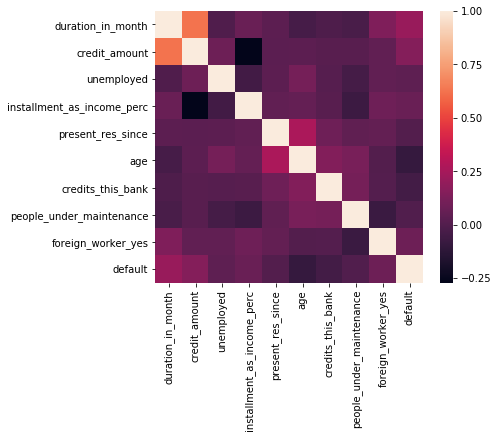

In [12]:
corr = data.corr()

plt.figure(figsize=[6, 5])
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

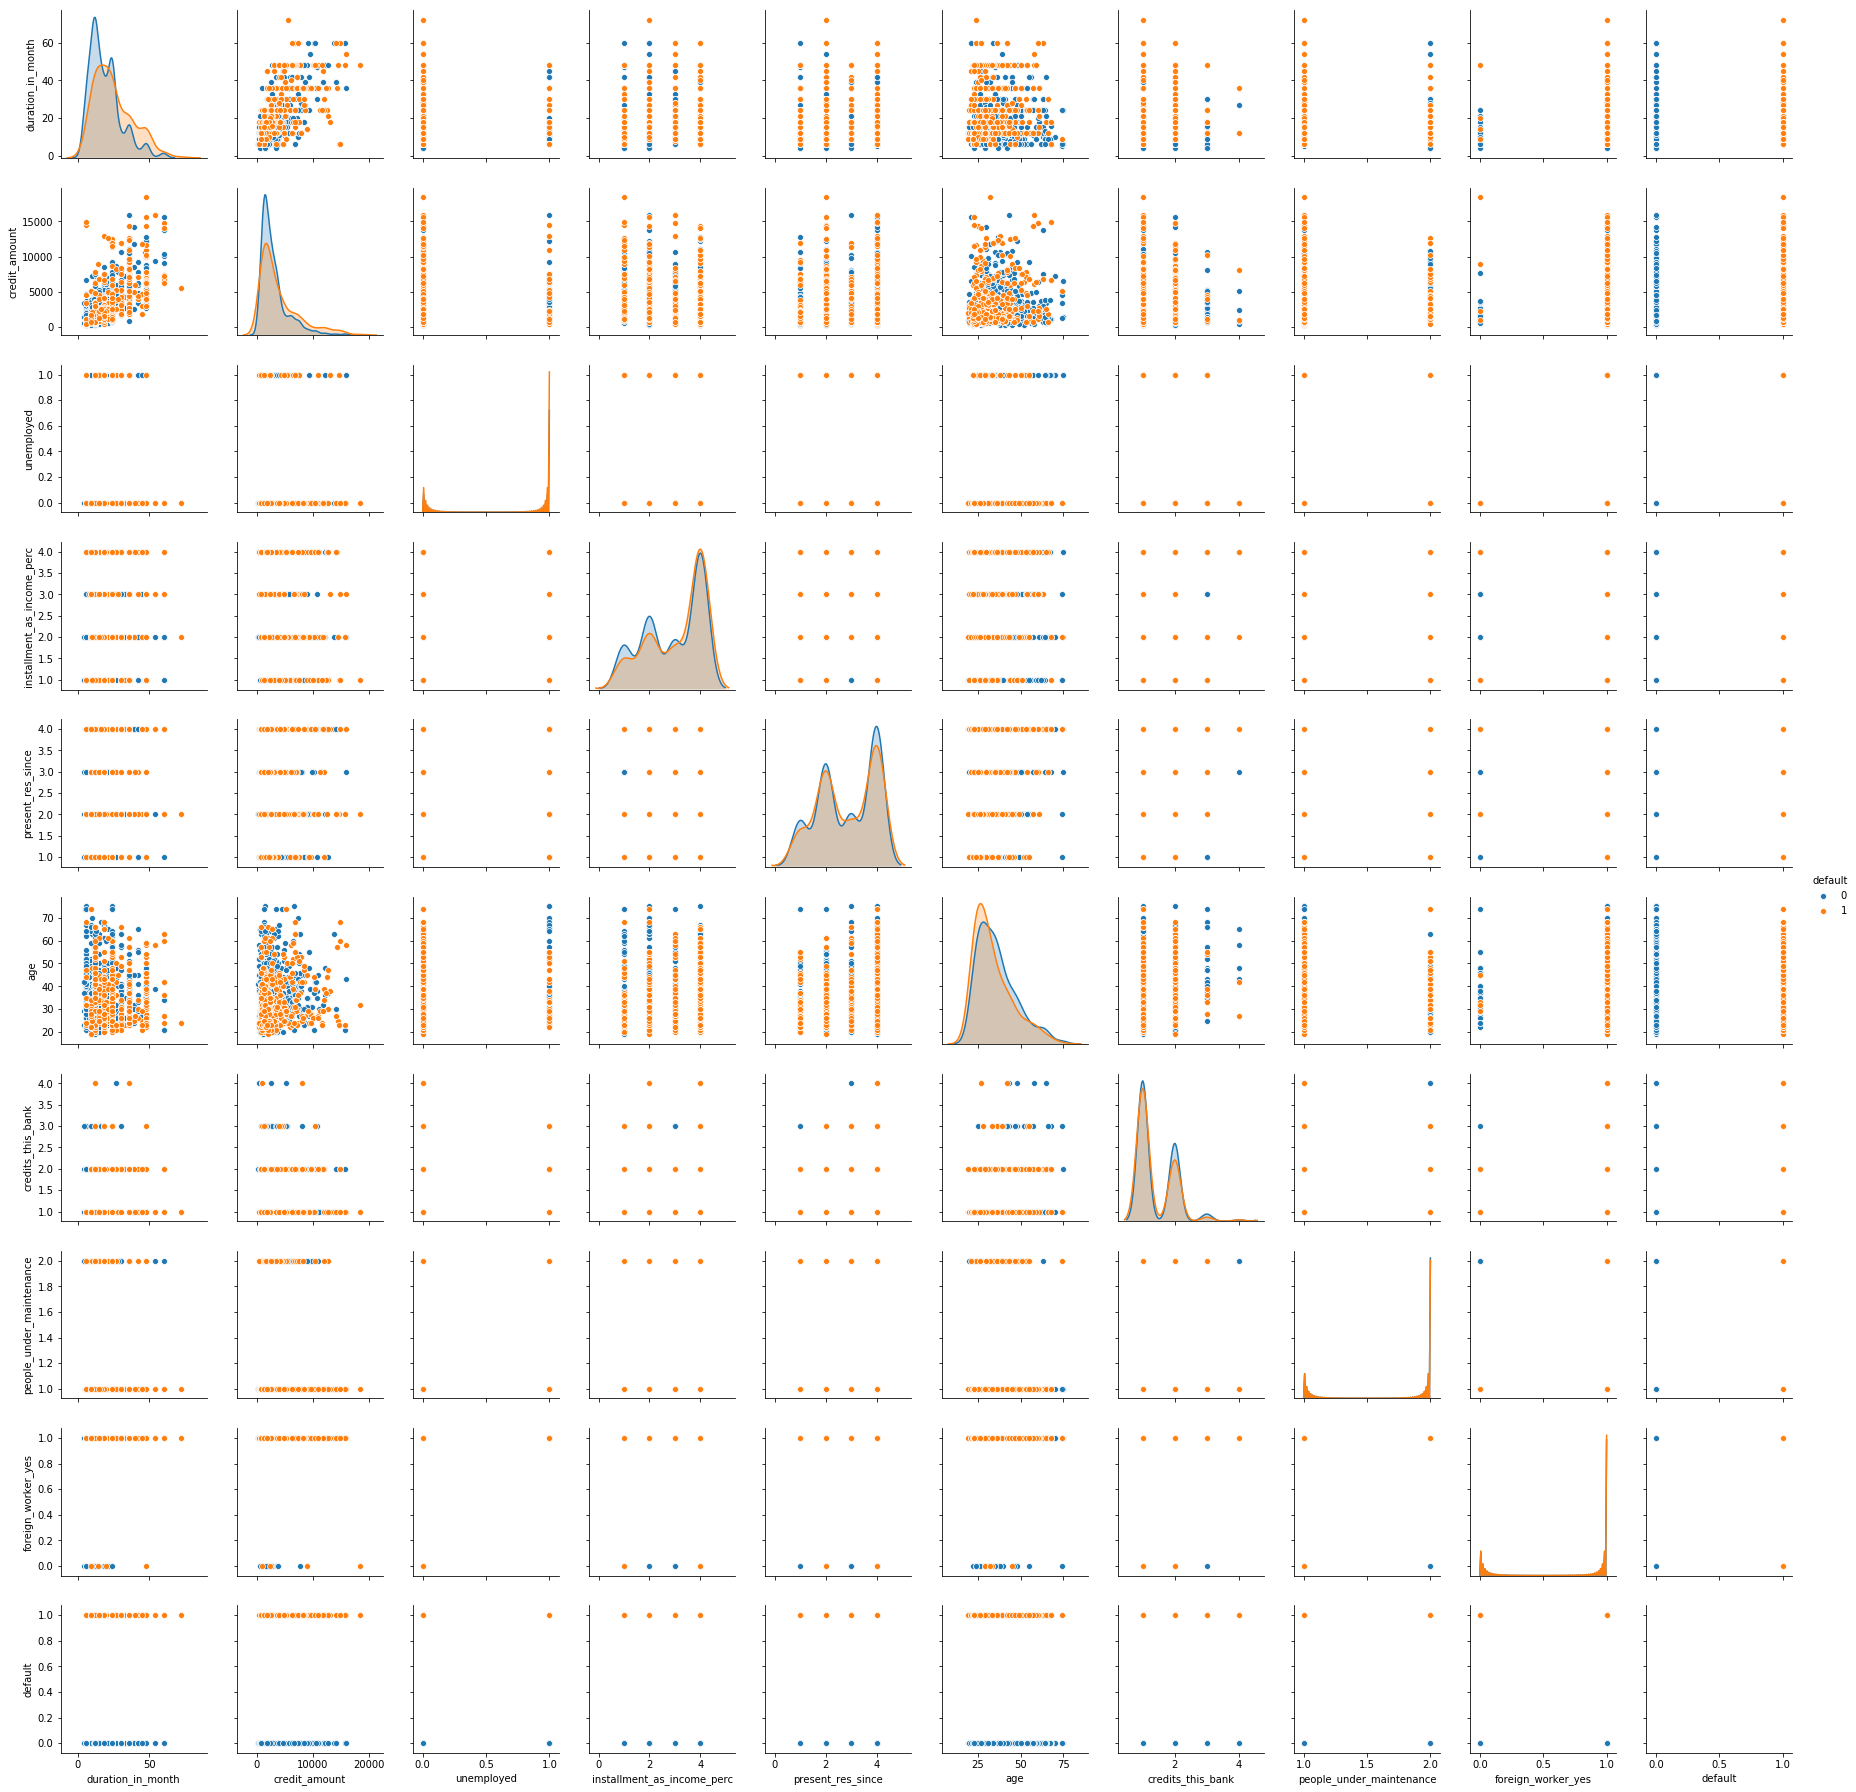

In [13]:
sns.pairplot(data, hue = 'default')

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, confusion_matrix, roc_auc_score, classification_report, roc_curve, accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [15]:
log_reg = data.copy()

# define X and y
X = log_reg.iloc[:, 0:-1]
y = log_reg.iloc[:, -1]

# split log_reg dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

In [18]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[536  23]
 [210  31]]

Confusion matrix for test:
[[140   1]
 [ 51   8]]


In [19]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.5437
Classification report for train:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       559
           1       0.57      0.13      0.21       241

    accuracy                           0.71       800
   macro avg       0.65      0.54      0.52       800
weighted avg       0.67      0.71      0.64       800


AUC test = 0.5643
Classification report for test:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       141
           1       0.89      0.14      0.24        59

    accuracy                           0.74       200
   macro avg       0.81      0.56      0.54       200
weighted avg       0.78      0.74      0.66       200



We see that the value of recall is very low, lower than 0.5. We need to do something about this one. We need to do over-sampling, we will use ADASYN).

### Oversampling to ADASYN

In [20]:
from imblearn.over_sampling import ADASYN

X_train, y_train = ADASYN().fit_sample(X_train, y_train)

In [21]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

In [23]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[322 237]
 [161 415]]

Confusion matrix for test:
[[86 55]
 [28 31]]


In [24]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.6483
Classification report for train:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       559
           1       0.64      0.72      0.68       576

    accuracy                           0.65      1135
   macro avg       0.65      0.65      0.65      1135
weighted avg       0.65      0.65      0.65      1135


AUC test = 0.5677
Classification report for test:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       141
           1       0.36      0.53      0.43        59

    accuracy                           0.58       200
   macro avg       0.56      0.57      0.55       200
weighted avg       0.64      0.58      0.60       200



We see that the recall score now is better than before even if the accuracy is a little lower.

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
ran_for = data.copy()

# define X and y
X = ran_for.iloc[:, 0:-1]
y = ran_for.iloc[:, -1]

# split log_reg dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

In [29]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[558   1]
 [ 21 220]]

Confusion matrix for test:
[[127  14]
 [ 39  20]]


In [30]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.9555
Classification report for train:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       559
           1       1.00      0.91      0.95       241

    accuracy                           0.97       800
   macro avg       0.98      0.96      0.97       800
weighted avg       0.97      0.97      0.97       800


AUC test = 0.6198
Classification report for test:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       141
           1       0.59      0.34      0.43        59

    accuracy                           0.73       200
   macro avg       0.68      0.62      0.63       200
weighted avg       0.71      0.73      0.71       200

